In [5]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## CCNA Book

In [3]:
def get_info(filepath):
    """
    """
    words = []
    with open(filepath) as myfile:
        for count_sent, line in enumerate(myfile):
            words.extend(line.split())
        vocab = set(words)
        print("File: {}".format(filepath))
        print("   Total number of sentences: {}".format(count_sent))
        print("   Total number of words: {}".format(len(words)))
        print("   Size of the vocabulary (unique words): {}".format(len(vocab)))
        print("   Size of the file: {:2f} GB".format(os.path.getsize(filepath)/(1024*1024*1024)))

file = '/raid/antoloui/Master-thesis/Data/QA/Cisco_CCNA_without_QA.txt'
get_info(file)

File: /raid/antoloui/Master-thesis/Data/QA/Cisco_CCNA_without_QA.txt
   Total number of sentences: 13465
   Total number of words: 308466
   Size of the vocabulary (unique words): 20986
   Size of the file: 0.001741 GB


## QA dataset

In [6]:
# Load dataframe.
filepath = '/raid/antoloui/Master-thesis/Data/QA/questions.csv'
df = pd.read_csv(filepath, sep=";")
df

,Question,QuestionType,Answer,AnswerType
0,Which protocols are examples of TCP/IP transpo...,Knowledge,UDP;TCP,Multiple
1,Which protocols are examples of TCP/IP data li...,Knowledge,Ethernet;PPP,Multiple
2,The process of HTTP asking TCP to send some da...,Knowledge,Adjacent-layer interaction,Unique
3,The process of TCP on one computer marking a T...,Knowledge,Same-layer interaction,Unique
4,The process of a web server adding a TCP heade...,Knowledge,Data encapsulation,Unique
...,...,...,...,...
194,Imagine a Cisco router model X. Cisco produced...,Scenario,>3,Unique
195,What is the name of the new Cisco IOS image fi...,Knowledge,Universal,Unique
196,What command enables you to show the UDI of yo...,Knowledge,show license udi,Unique
197,What is a CLI command on a router that is usef...,Knowledge,license install url,Unique


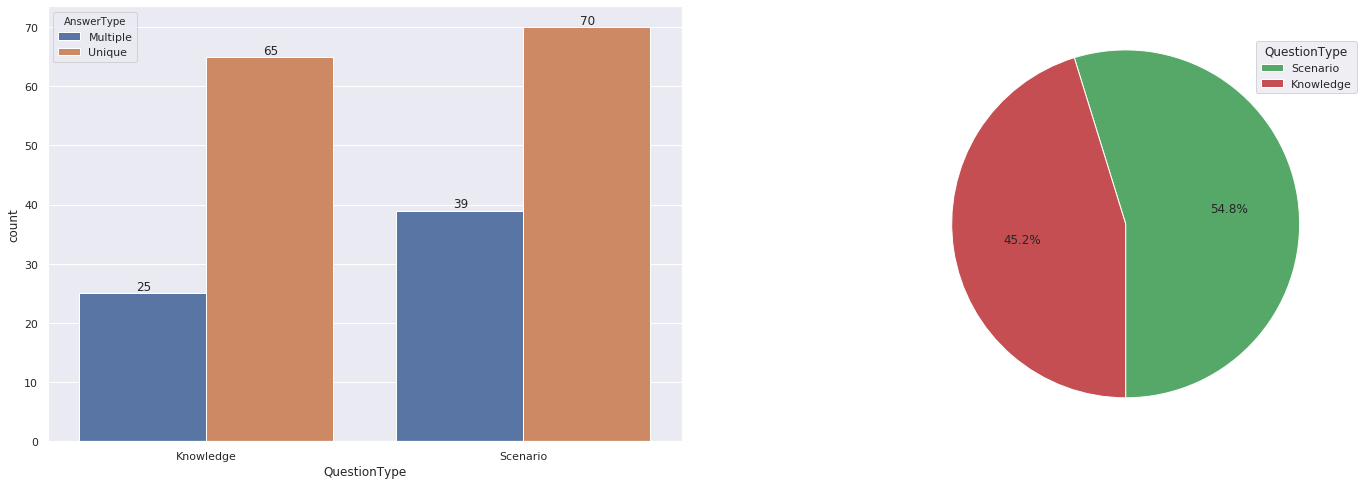

In [38]:
fig = plt.figure(figsize=(25,8))
sns.set(font_scale = 1)

# Create countplot.
ax1 = fig.add_subplot(1, 2, 1)
ax1 = sns.countplot(x="QuestionType", hue="AnswerType", data=df)
for p in ax1.patches:
    ax1.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.18, p.get_height()+0.5))

# Create pie chart.
ax2 = fig.add_subplot(1, 2, 2)
df.QuestionType.value_counts().plot(kind='pie', ax=ax2, autopct='%1.1f%%', startangle=270, fontsize=12, labels=None, colors=sns.color_palette()[2:4])
ax2.set_ylabel('')
ax2.legend(title= 'QuestionType', loc=(0.8,0.8), labels=df.QuestionType.unique().tolist()[::-1])

# Show the plot.
plt.show()